## 1. Vožnje

Vožnje so shranjene v datotekah v takšni obliki:

```
Ana,15
Berta,42
Ana,85
Berta,83
Cilka,15
Berta,29
Berta,82
Dani,81
Cilka,192
Dani,92
Ana,115
Ema,200
```

Vsaka vrstica vsebuje ime voznika in razdaljo. Napišite naslednje funkcije:

- `kilometri(ime_datoteke)` vrne slovar, katerega ključi so imena voznikov, pripadajoče vrednosti pa skupna dolžina voženj, ki jih je opravil ta voznik. Za primer iz okvirčka vrne `{'Ana': 215, 'Berta': 236, 'Cilka': 207, 'Dani': 173, 'Ema': 200}`.
- `prekrskarji(ime_datoteke, meja)` vrne seznam imen voznikov, ki so prevozili več kot `meja` kilometrov. Klic `prekrskarji("voznice.txt", 200)` vrne `["Ana", "Berta", "Cilka"]`.

### Rešitev

To je tako podobno vsem dražbam, ki smo jih predelovali na predavanjih, da ne bi smelo biti pretežko.

In [1]:
def kilometri(ime_dat):
    kilometrina = defaultdict(int)
    for vrstica in open(ime_dat):
        ime, km = vrstica.split(",")
        kilometrina[ime] += int(km)
    return kilometrina

def prekrskarji(ime_dat, meja):
    imena = []
    for ime, km in kilometri(ime_dat).items():
        if km > meja:
            imena.append(ime)
    return imena

## 2. Potovanje

V testih je že napisana funkcija `razdalja(odkod, kam)`, ki vrne razdaljo med dvema krajema. Klic `razdalja("Kranj", "Ljubljana")` vrne 26. Klic `razdalja("Kranj", "Kranj")` vrne `0`. **Te funkcije ne pišite, ta že obstaja!**

- `dolzina_vozenj(poti)` prejme seznam relacij (v obliki parov krajev), ki jih mora ta voznik prevoziti in vrne skupno dolžino teh relacij. Uporabite zgoraj opisano, podano funkcijo razdalja. Klic `dolzina_vozenj([("Ljubljana", "Kranj"), ("Kranj", "Novo mesto"), ("Lendava", "Ormož")])` vrne 176, kolikor je vsota razdalj med Ljubljano in Kranjem, Kranjem in Novim mestom ter Lendavo in Ormožem.
- `prevozeno(zacetek, poti)` poleg tega kot prvi argument prejme ime kraja, v katerem se voznik nahaja v začetku. Pri računu dolžine poti upošteva, da mora priti voznik do začetnega kraja, poleg tega doda dolžine relacij med koncem ene in začetkom naslednje. Če pokličemo `prevozeno("Postojna", [("Ljubljana", "Kranj"), ("Kranj", "Novo mesto"), ("Lendava", "Ormož")])` bo poleg prej naštetih relacij upošteval še razdaljo med Postojno in Ljubljano ter med Novim mestom in Lendavo.

### Rešitev

Iti moramo čez zaporedne pare krajev na poti, kar, vemo, naredimo s `pairwise(pot)`. Za vsak par pokličemo `razdalja` in to lepo seštevamo.

In [2]:
def dolzina_vozenj(poti):
    km = 0
    for x, y in poti:
        km += razdalja(x, y)
    return km

V drugi dodamo že razdaljo med začetnim - ali prejšnjim - krajem in novim.

In [3]:
def prevozeno(zacetek, poti):
    km = 0
    for x, y in poti:
        km += razdalja(zacetek, x) + razdalja(x, y)
        zacetek = y
    return km

Nekateri so namesto ene zanke naredili dve: v prvi so iz seznama parov sestavili nov seznam, ki v katerem so bili kraji (v bistvu) podvojeni, nato pa so računali pare med temi kraji. No, če tale stavek zveni zapleteno: ni, vendar je takšna rešitev vseeno bolj zapletena, kot bi bilo potrebno. :)

## 3. Déjà vu

Naslednje funkcije prejmejo tri argumente: ime voznika in tabeli v numpyju, ki vsebujeta stolpca, kakršna imajo datoteke iz prve naloge, torej `["Ana", "Berta", "Ana", "Berta", "Cilka", ...]` in `[15, 42, 85, 83, 15, 29 ...]`. Uporabite, kar potrebujete. Naloge rešujte z numpyjem; drugačne rešitve bodo prejele polovično število točk.

- `stevilo_vozenj(voznik, vozniki, razdalje)` vrne število voženj, ki jih je opravil podani voznik.
- `prevozena_razdalja(voznik, vozniki, razdalje)` vrne skupno razdaljo, ki jo je prevozil podani voznik
- `povprecje_treh(voznik, vozniki, razdalje)` vrne povprečno razdaljo najdaljših treh voženj. Če je voznik opravil le dve vožnji, vrne njuno povprečno dolžino; če le eno, vrne dolžino te.

### Rešitev

Vse funkcije so dobile tri argumente; iz čiste hudobije. Prva potrebuje le dva, saj se ne ukvarja z razdaljami. Na to sem sicer namignil tudi v besedilu naloge.

Izvzemši to hudobijo je naloga sestavljena na moč prijazno, saj je narejena v obliki stopničk: vsaka naslednja funkcija temelji na ideji, ki jo moramo imeti za prejšnjo. Tako do zadnje funkcijo pridemo lepo po stopničkah.

Rešitve so takšne:

In [5]:
def stevilo_vozenj(voznik, vozniki, razdalje):
    return np.sum(vozniki == voznik)

def prevozena_razdalja(voznik, vozniki, razdalje):
    return np.sum(razdalje[vozniki == voznik])

def povprecje_treh(voznik, vozniki, razdalje):
    return np.mean(np.sort(razdalje[vozniki == voznik])[-3:])

Prva funkcija je uvodna in nas napelje na to, da se splača sestaviti `vozniki == voznik`; ta ideja nam bo prišla prav tudi v prihodnjih dveh nalogah. (Nekateri so tu in v naslednjih funkcijah klicali tudi `flatnonzero`; to je nepotrebno.) V prvi, torej, dobimo, tabelo `True`-jev in `False`-ov, pri čemer `True`-ji ustrezajo elementom, ki so enaki iskanem vozniku. Ker je `True` toliko kot `1` in `False` toliko kot `0`, je vsota te tabele ravno število voženj tega voznika.

V drugi funkciji to tabelo uporabimo kot masko v tabelo razdalj in jo seštejemo.

V tretji te razdalje uredimo in izračunamo povprečje zadnjih treh. Če jih je manj kot 3, bo tabela pač krajša. `np.mean` se ne bo jezil niti, če dobi tabelo dolžine 1.

## 4. Kombiniranje voženj

Imamo nek začetni kraj, recimo LJ. Imamo seznam relacij, ki jih je potrebno prevoziti, na primer` [("LJ", "ŠL"), ("LJ", "KR"), ("ŠL", "KR"), ("KR", "CE"), ("LJ", "CE"), ("LJ", "NM"), ("NM", "ČR"), ("NM", "CE"), ("KO", "ČR"), ("KO", "LJ")]`. (Te relacije so prikazane na sliki.) Relacije ne vsebujejo ciklov – če vozimo po njih, se ne bomo nikoli vrnili v kraj, v katerem smo že bili. (To poenostavi funkcijo, ki jo boste pisali!)

Če začnemo v LJ, lahko gremo v CE in obtičimo tam. Lahko pa gremo LJ – KR – CE. Še daljša možnost je LJ – ŠL – KR – CE. To je hkrati najdaljša pot, ki jo lahko sestavimo iz teh relacij, če začnemo v LJ.

Napišite funkcijo `kombiniraj(zacetek, relacije)`, ki prejme začetni kraj in seznam relacij ter vrne največje število relacij, ki jih lahko prevozimo. V gornjem primeru vrne 3.

Če bi namesto tega začeli v KO, bi vrnila 4. (Iz slike je očitno: toliko kot vrne za LJ in še 1 več, ker gremo prej še KO – LJ.)
Kdor je večji frajer, frajerka, pa bo namesto tega napisal funkcijo tako, da bo vrnila zaporedje krajev. Za gornji primer vrne `["LJ", "ŠL", "KR", "CE"]` oziroma `["KO", "LJ", "ŠL", "KR", "CE"]`. (Ta različica pravzaprav ni nič težja od prejšnje, vendar se vam bo prejšnja morda zdela lažja.)

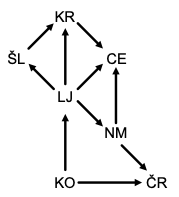

### Rešitev

Tole je naloga iz rekurzije, ki je pravzaprav enaka nalogi, v kateri smo iskali globino rodbine. Vprašamo "otroke", kako daleč lahko pridejo. K največji številki, ki jo dobimo od otrok, prišetejemo 1.

In [4]:
def kombiniraj(zacetek, relacije):
    naj = 0
    for odkod, kam in relacije:
        if odkod == zacetek:
            ta = 1 + kombiniraj(kam, relacije)
            if ta > naj:
                naj = ta
    return naj

Druga različica je podobna, le da otroke vprašamo, kam lahko pridejo. K najdaljši poti, ki jo dobimo od katerega od otrok, dodamo še sebe.

In [6]:
def kombiniraj(zacetek, relacije):
    naj = []
    for odkod, kam in relacije:
        if odkod == zacetek:
            ta = kombiniraj(kam, relacije)
            if len(ta) > len(naj):
                naj = ta
    return [zacetek] + naj